# Release highlights for OpenTURNS 1.17

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

### KarhunenLoeveValidation

The first new class is the [KarhunenLoeveValidation](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.KarhunenLoeveValidation.html) which provides several graphical KL decomposition services.

In [2]:
# lets perform a KL decomposition of a Gaussian process
numberOfVertices = 20
interval = ot.Interval(-1.0, 1.0)
mesh = ot.IntervalMesher([numberOfVertices - 1]).build(interval)
covariance = ot.SquaredExponential()
process = ot.GaussianProcess(covariance, mesh)
sampleSize = 100
processSample = process.getSample(sampleSize)
threshold = 1.0e-7
algo = ot.KarhunenLoeveSVDAlgorithm(processSample, threshold)
algo.run()
klresult = algo.getResult()

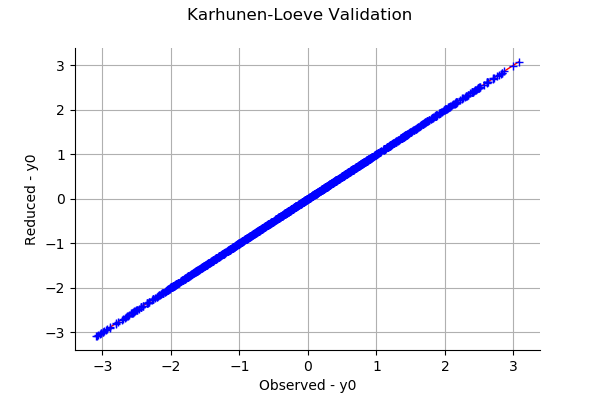

In [3]:
validation = ot.KarhunenLoeveValidation(processSample, klresult)

# Plot the model vs metamodel graph for visual validation
validation.drawValidation()

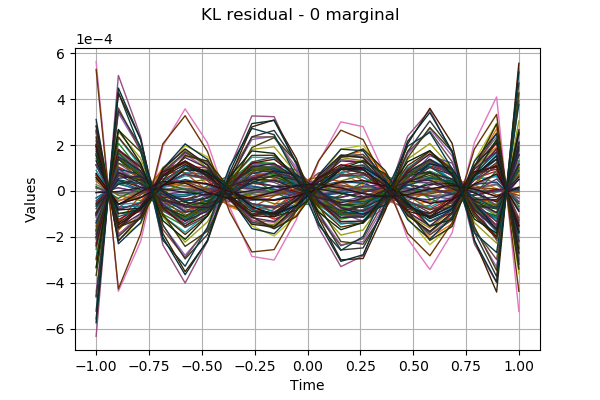

In [4]:
# Field of residuals
validation.computeResidual().drawMarginal(0)

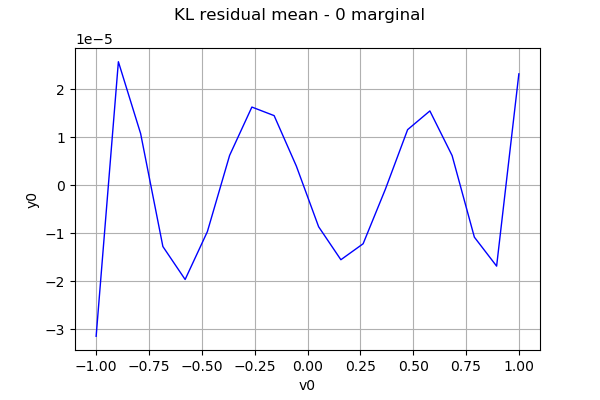

In [5]:
# Field of residual mean
validation.computeResidualMean().drawMarginal(0)

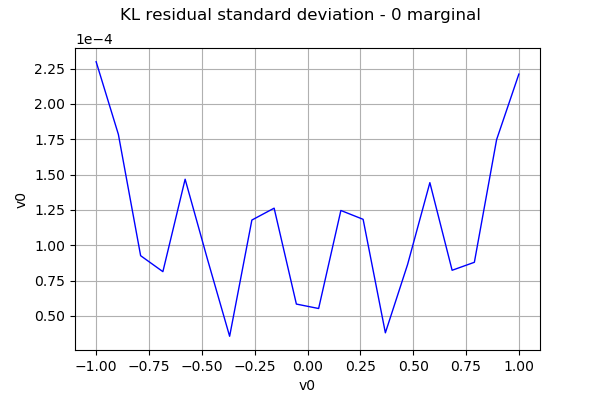

In [6]:
# Field of residual stddev
validation.computeResidualStandardDeviation().drawMarginal(0)

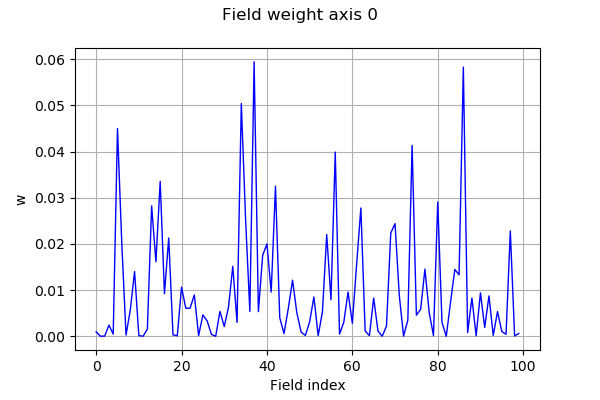

In [7]:
# Weight of each observation in the decomposition
validation.drawObservationWeight(0)

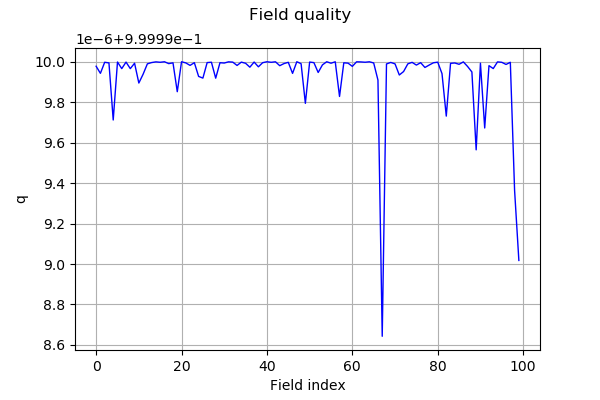

In [8]:
# Quality of representation of each observation
validation.drawObservationQuality()

### KarhunenLoeveReduction

In the same theme [KarhunenLoeveReduction](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.KarhunenLoeveReduction.html) class allows to reduce a field with or without accounting for the trend.

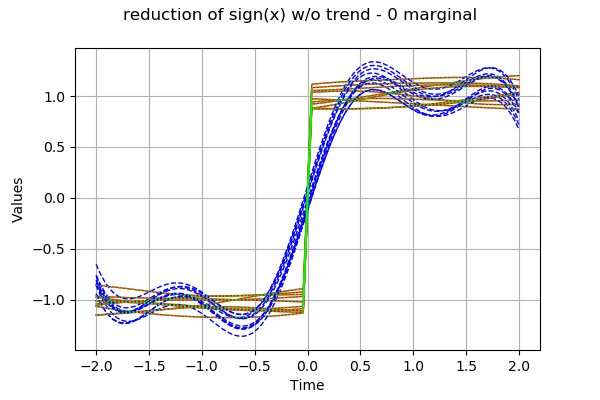

In [9]:
N = 100
M = 1000
P = 10
mean = ot.SymbolicFunction("x", "sign(x)")
cov = ot.SquaredExponential([1.0], [0.1])
mesh = ot.IntervalMesher([N]).build(ot.Interval(-2.0, 2.0))
process = ot.GaussianProcess(ot.TrendTransform(mean, mesh), cov, mesh) 
sample = process.getSample(M)
algo = ot.KarhunenLoeveSVDAlgorithm(sample, 1e-6)
algo.run()
result = algo.getResult()
trend = ot.TrendTransform(ot.P1LagrangeEvaluation(sample.computeMean()), mesh)
sample2 = process.getSample(P)
sample2.setName('reduction of sign(x) w/o trend')
reduced1 = ot.KarhunenLoeveReduction(result)(sample2)
reduced2 = ot.KarhunenLoeveReduction(result, trend)(sample2)
g = sample2.drawMarginal(0)
g.setColors(["red"])
g1 = reduced1.drawMarginal(0)
g1.setColors(["blue"])
drs = g1.getDrawables()
for i, d in enumerate(drs):
    d.setLineStyle("dashed")
    drs[i] = d
g1.setDrawables(drs)
g.add(g1)
g2 = reduced2.drawMarginal(0)
g2.setColors(["green"])
drs = g2.getDrawables()
for i, d in enumerate(drs):
    d.setLineStyle("dotted")
    drs[i] = d
g2.setDrawables(drs)
g.add(g2)
g

### VonMisesFactory

The new [VonMisesFactory](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.VonMisesFactory.html) class allows to estimate the parameters of the Von-Mises distribution.

Until now we had the distribution available but not its factory.

### IsotropicCovarianceModel

The new [IsotropicCovarianceModel](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.IsotropicCovarianceModel.html) class allows to define an isotropic covariance model of any dimension from an 1-d covariance model.


### KroneckerCovarianceModel

The new [KroneckerCovarianceModel](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.KroneckerCovarianceModel.html) class allows to define a multivariate stationary Kronecker covariance function.

### KFoldSplitter/LeaveOneOutSplitter

The new [KFoldSplitter](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.KFoldSplitter.html)
and [LeaveOneOutSplitter](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.LeaveOneOutSplitter.html)
classes allow to split a sample in train/test sample pairs.

In [12]:
X = ot.Normal().getSample(10)
k = 5
splitter = ot.KFoldSplitter(X.getSize(), k)
splitter.setRandomize(True)
for indices1, indices2 in splitter:
    print(indices1, indices2)
    X_train, X_test = X[indices1], X[indices2]

[2,0,7,9,4,1,8,6] [5,3]
[5,0,7,9,3,1,8,6] [2,4]
[5,2,7,9,3,4,8,6] [0,1]
[5,2,0,9,3,4,1,6] [7,8]
[5,2,0,7,3,4,1,8] [9,6]


### VertexValuePointToFieldFunction

The new [VertexValuePointToFieldFunction](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.KroneckerCovarianceModel.html) class allows to define a vector to field function from a vector function.

In [11]:
g = ot.SymbolicFunction(['t', 'x'], ['x + t^2'])
grid = ot.RegularGrid(0.0, 0.2, 6)
f = ot.VertexValuePointToFieldFunction(g, grid)
x = [4.0]
print(f(x))

    [ y0   ]
0 : [ 4    ]
1 : [ 4.04 ]
2 : [ 4.16 ]
3 : [ 4.36 ]
4 : [ 4.64 ]
5 : [ 5    ]
